<a href="https://colab.research.google.com/github/Maitreyeej/Global_Suicides_Number_Prediction/blob/main/Suicide_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and Creating a Dataframe**

In [2]:
from sklearn.preprocessing import StandardScaler        #Import modules for modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd             #Basic module import
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/CODING_DOJO/suicide.csv'
Suicide_df=pd.read_csv(filename) 
Suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# **Data Evaluation**

In [4]:
Suicide_df.info()       #Basic info for the data available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
Suicide_df.describe()    #Basic description of parameters

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
Suicide_df['age'].value_counts()          # checking number of age groups

75+ years      4642
55-74 years    4642
15-24 years    4642
35-54 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [7]:
Suicide_df['generation'].value_counts()         #check for number generation groups

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [8]:
Suicide_df=Suicide_df.drop(columns=['country-year', 'HDI for year'])      #dropping the columns due to excessive missing data and duplicated information from other columns

In [9]:
Suicide_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [10]:
Suicide_df.rename(columns = {' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace = True)

In [11]:
Suicide_df.info()       #checking the information after handling the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_for_year ($)    27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [40]:
Suicide_population=Suicide_df.groupby(['year'])['population'].sum()

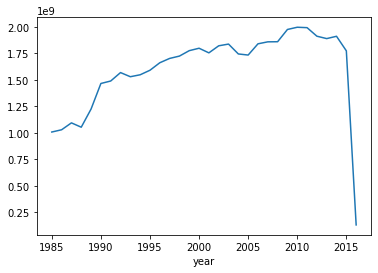

In [41]:
Suicide_population.plot();

As we see, there is a dramatic drop in the population after 2014, it seems unlikely and probability is that the data is incorrect. We will drop the data from 2014.

In [12]:
Suicide_df_1=Suicide_df[Suicide_df['year']<2014]

In [42]:
Suicide_df_1.groupby(['country'])['population'].sum() 

country
Albania                   62325467
Antigua and Barbuda        1807502
Argentina                957009252
Armenia                   69349776
Aruba                      1259677
                           ...    
United Arab Emirates      36502275
United Kingdom          1617114356
United States           7456198955
Uruguay                   77700503
Uzbekistan               459109025
Name: population, Length: 100, dtype: int64

In [13]:
Suicide_df_1

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27803,Uzbekistan,2013,female,35-54 years,99,3547895,2.79,"57,690,453,461",2150,Generation X
27804,Uzbekistan,2013,female,75+ years,8,345180,2.32,"57,690,453,461",2150,Silent
27805,Uzbekistan,2013,male,5-14 years,61,2720938,2.24,"57,690,453,461",2150,Generation Z
27806,Uzbekistan,2013,female,55-74 years,21,1356298,1.55,"57,690,453,461",2150,Boomers


# **EDA**

Text(0.5, 1.0, 'Box Plot for Mean number of suicides as per Age Group')

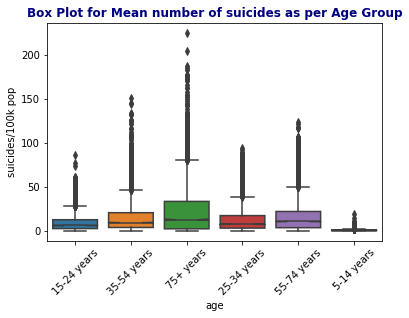

In [21]:
#Box Plot for average number of suicides per age group
ax=sns.boxplot(x='age', y='suicides/100k pop', data=Suicide_df_1, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Box Plot for Mean number of suicides as per Age Group', fontweight='bold', c='navy');

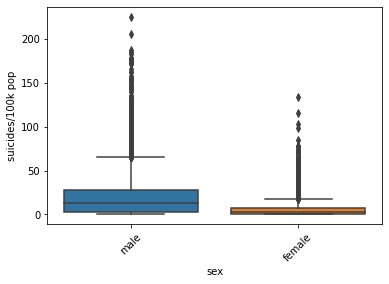

In [22]:
#Box plot for average number of suicides per sex
ax=sns.boxplot(x='sex', y='suicides/100k pop', data=Suicide_df_1, notch=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [20]:
#Visualization for the effect of gdp per capita on number of suicides
Suicide_capita=Suicide_df_1.groupby(['gdp_per_capita ($)'])['suicides/100k pop'].mean()

Text(0.5, 1.0, 'Effect of GDP_per_capita on number of suicides')

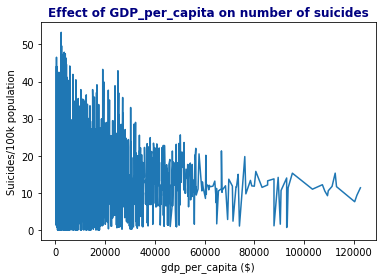

In [23]:
Suicide_capita.plot()
plt.ylabel('Suicides/100k population')
plt.title('Effect of GDP_per_capita on number of suicides', fontweight='bold', c='navy');

In [17]:
#Gdp per capita over the years
Suicide_gdp=Suicide_df_1.groupby(['year'])['gdp_per_capita ($)'].mean()

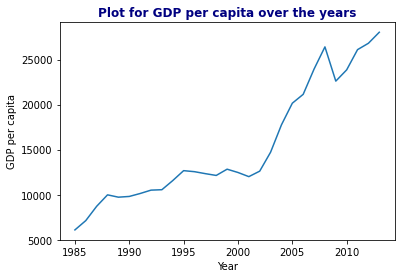

In [44]:
Suicide_gdp.plot()
plt.title('Plot for GDP per capita over the years', fontweight='bold', c='navy')
plt.xlabel('Year')
plt.ylabel('GDP per capita');

In [46]:
#Population over the years
Suicide_population=Suicide_df_1.groupby(['year'])['population'].sum()

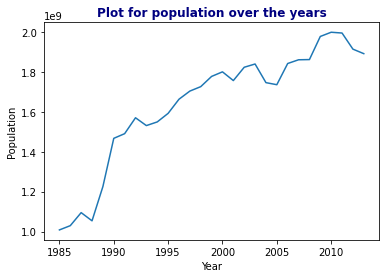

In [48]:
Suicide_population.plot();
plt.title('Plot for population over the years', fontweight='bold', c='navy')
plt.xlabel('Year')
plt.ylabel('Population');

In [49]:
#Pivot table for getting the information on range of population per age group
pivot_population=Suicide_df_1.pivot_table(columns=['age'], index=['year'], values=['population'], aggfunc=np.sum)

In [50]:
pivot_population

population                                                          
age  15-24 years 25-34 years 35-54 years 5-14 years 55-74 years  75+ years
year                                                                      
1985   196974439   173536624   246046628  199192522   152769432   40080441
1986   199238573   176214788   253601356  202815438   156574209   41465249
1987   208588197   188988532   273473250  208313887   169554641   46111219
1988   196035518   181934957   267264139  195336565   166789014   46734231
1989   219927016   213566446   316627576  222337932   197860873   55194504
1990   262224981   255943494   381429036  264959789   235387943   66674857
1991   263683586   258085415   391411658  267650607   241269189   67887929
1992   278729125   270397353   412814790  286065805   251982954   69549420
1993   267069051   260776673   407012350  275649767   251229172   68679641
1994   267468800   263220968   417589803  272020060   258671110   69778631
1995   272391062   268186691   434002463  276545519   267815735   72617633
1996   285894005   278429626   454968532  290936431   276361725   75677343
1997   294538353   285003000   466646342  302524185   277090379   77189260
1998   296626620   286231329   478662917  302835669   281202250   79622566
1999   304307108   291530934   500176591  307095027   289611423   83642072
2000   306833668   294464558   512406074  307228422   291933570   86361616
2001   297966000   284481809   503304611  294718908   287082265   88011896
2002   309304957   296207160   524892282  301180148   298245176   92323092
2003   311965575   296827661   531132194  299034887   304473586   95024117
2004   290415721   279976620   509520667  270982469   298895614   95455522
2005   286690446   278296962   507445700  264397401   301001533   97077603
2006   305127668   295325866   536511821  283329957   318224726  102388799
2007   305436926   298222521   542880362  281095405   326135725  105793414
2008   302200881   297532003   542789284  278903896   332062421  107132366
2009   321540733   318594904   575243831  297254525   351397333  112197040
2010   321498365   321277547   581133742  297317505   361189135  114881035
2011   317262371   318111842   578742563  294238144   367532048  117475364
2012   295020664   303401688   558344819  271680873   365281729  119082315
2013   288206852   298709101   550420191  268175176   364931201  119719189

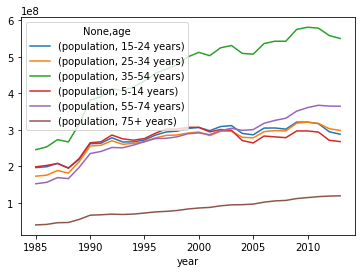

In [64]:
pivot_population.plot();

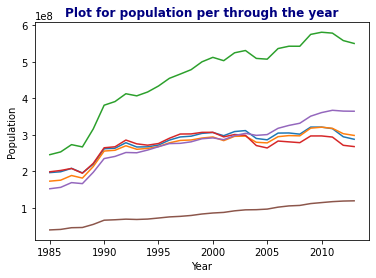

In [27]:
plt.plot(pivot_population)
plt.title('Plot for population per through the year', fontweight='bold', c='navy')
plt.xlabel('Year')
plt.ylabel('Population');

In [18]:
#Pivot table for getting the information on range of Suicides/100k population per age group
pivot_age = Suicide_df_1.pivot_table(columns=['age'], index=['year'], values=['suicides/100k pop'], aggfunc=np.sum)

In [28]:
pivot_age

suicides/100k pop                                                         
age        15-24 years 25-34 years 35-54 years 5-14 years 55-74 years 75+ years
year                                                                           
1985            809.25      960.84     1190.69      51.56     1449.06   2350.49
1986            782.60     1017.01     1122.76      40.46     1340.64   2276.37
1987            808.69     1183.72     1337.43      52.36     1614.15   2549.10
1988            857.59     1216.19     1291.25      46.79     1552.62   2508.69
1989            952.69     1266.53     1412.79      57.56     1664.04   2682.93
1990           1166.74     1581.93     1788.83      67.08     2004.55   3269.62
1991           1267.92     1598.91     1862.26      72.74     2103.82   3415.41
1992           1194.25     1644.40     2023.98      75.77     2222.71   3367.77
1993           1213.03     1715.82     2104.55     100.93     2244.18   3411.78
1994           1290.33     1700.02     2190.51      85.00     2345.88   3872.05
1995           1618.73     2294.15     2896.41      94.11     3047.45   4709.41
1996           1620.38     2225.89     2831.15     113.25     3025.02   4326.52
1997           1656.99     2189.66     2718.52      98.66     2896.37   4257.63
1998           1614.62     2241.75     2824.65     115.29     3017.51   4336.90
1999           1748.36     2386.64     2890.01     109.02     3052.64   4287.24
2000           1624.15     2366.19     2828.26      91.58     3015.38   4461.89
2001           1618.72     2325.57     2892.34     105.19     3060.17   4274.22
2002           1640.38     2283.04     2791.34     110.28     3013.61   4389.07
2003           1551.87     2144.21     2765.27     105.72     2990.77   4069.74
2004           1461.05     2000.72     2522.20     102.64     2702.56   3792.63
2005           1388.19     1970.14     2410.15     118.89     2657.75   3619.87
2006           1450.09     1864.05     2390.74      99.33     2488.25   3873.55
2007           1419.76     2058.83     2364.54     111.15     2486.65   3969.22
2008           1426.23     1914.94     2452.07     105.20     2551.85   3695.55
2009           1429.18     1957.17     2506.18     106.44     2597.12   3579.95
2010           1403.38     1906.23     2398.29     114.20     2436.90   3584.99
2011           1447.76     1827.21     2286.93     109.68     2367.78   3328.48
2012           1363.60     1737.66     2214.23     104.12     2325.46   3356.84
2013           1309.45     1728.82     2119.91     105.57     2297.64   3102.25

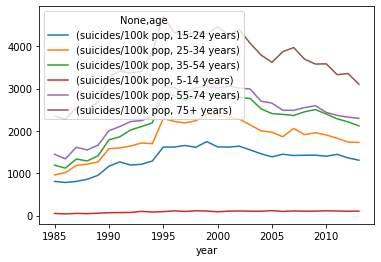

In [29]:
pivot_age.plot()

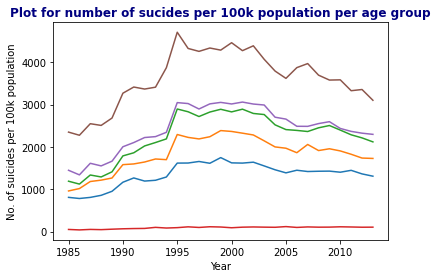

In [30]:
plt.plot(pivot_age)
plt.title('Plot for number of sucides per 100k population per age group', fontweight='bold', c='navy')
plt.xlabel('Year')
plt.ylabel('No. of suicides per 100k population');

Number of suicides has been surprisingly decreasing. And as expected, there are no suicides for the ages 5-14.

In [33]:
#Population distribution as per sex
Suicide_sex_pop=Suicide_df_1.groupby(['sex'])['population'].sum()

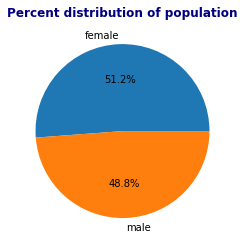

In [34]:
Pie_Sex_pop=Suicide_sex_pop.values
Pie_Sex_label_pop= Suicide_sex_pop.index
temp=Pie_Sex_pop.sum()

for ele in Pie_Sex_pop:
   ele=ele/temp*100

plt.title('Percent distribution of population', c='navy', fontweight='bold')
plt.pie(Pie_Sex_pop, autopct='%1.1f%%', labels= Pie_Sex_label_pop);

In [36]:
#Distribution of Suicides as per Sex
Suicide_sex=Suicide_df.groupby(['sex'])['suicides_no'].sum()
Suicide_sex

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

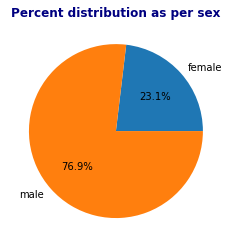

In [37]:
Pie_Sex=Suicide_sex.values
Pie_Sex_label= Suicide_sex.index
temp=Pie_Sex.sum()

for ele in Pie_Sex:
   ele=ele/temp*100

plt.title('Percent distribution as per sex', c='navy', fontweight='bold')
plt.pie(Pie_Sex, autopct='%1.1f%%', labels= Pie_Sex_label);

It is usually said that there is higher tendancy of suicide in males than in females. After analysing this data, we can see that the number of male suicides is almost more than three times that of females.

In [51]:
#Remove ',' from gdp_for_year 
def nochar (s):
 
    s_counts=s.count(',')
    s=list(s)

    while s_counts:
       s.remove(',')
       s_counts-=1

    s = '' . join(s)
    s=int(s)
    return s

Suicide_df_1['gdp_for_year ($)']=Suicide_df_1['gdp_for_year ($)'].apply(nochar)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [52]:
Suicide_df_1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


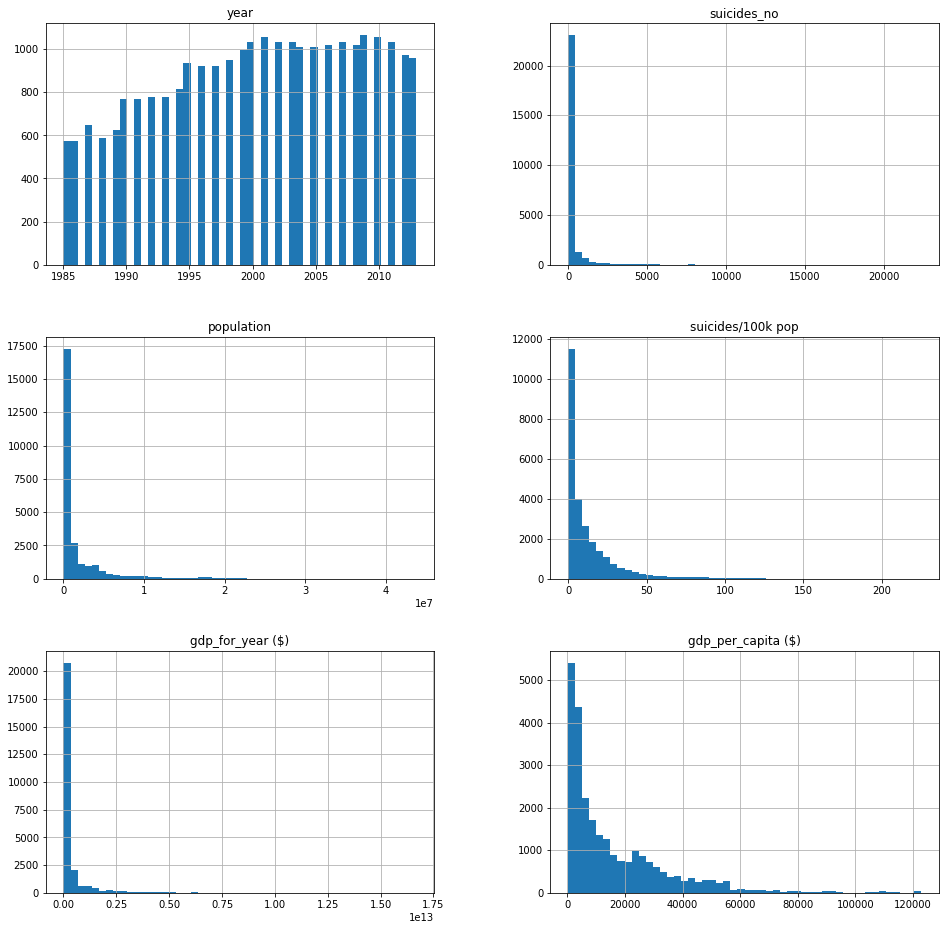

In [53]:
#Distribution of numerical features
Suicide_df_1.loc[:,:].hist(bins=50,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10');

In [56]:
#Correlation Matrix and Correlation Map
Suicide_df_1.corr().sort_values(by = ['suicides/100k pop']) 

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004717,0.002835,-0.033777,0.090022,0.332490
gdp_per_capita ($),0.332490,0.062531,0.086447,0.003520,0.311555,1.000000
population,0.002835,0.610108,1.000000,0.008567,0.710331,0.086447
gdp_for_year ($),0.090022,0.421262,0.710331,0.025684,1.000000,0.311555
suicides_no,-0.004717,1.000000,0.610108,0.308768,0.421262,0.062531
suicides/100k pop,-0.033777,0.308768,0.008567,1.000000,0.025684,0.003520


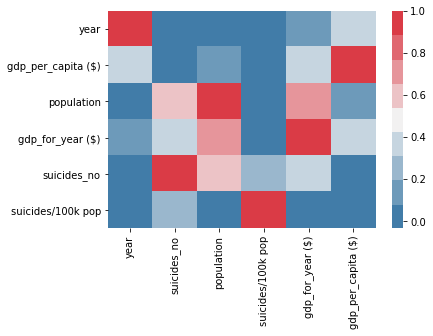

In [58]:
sns.heatmap(Suicide_df_1.corr().sort_values(by = ['suicides/100k pop']), cmap = sns.diverging_palette(240, 10, n=9)); 

# **Data Preparation for modeling**

we will get rid of column country as it will be represented by gdp and population. Suicides_no is represented by suicides/100k population. This gives us more absolute density of suicides which is more comparable betweeen countries.
'gdp for year' is also captured in 'gdp per capita' and 'generation' is synonimous with the age group so they are essentially the same column.

In [60]:
#Prepare for the data for modeling
Suicide_data=Suicide_df_1.drop(columns=['country', 'suicides_no', 'gdp_for_year ($)', 'generation'])

In [ ]:
Suicide_data

,year,sex,age,population,suicides/100k pop,gdp_per_capita ($)
0,1987,male,15-24 years,312900,6.71,796
1,1987,male,35-54 years,308000,5.19,796
2,1987,female,15-24 years,289700,4.83,796
3,1987,male,75+ years,21800,4.59,796
4,1987,male,25-34 years,274300,3.28,796
...,...,...,...,...,...,...
27803,2013,female,35-54 years,3547895,2.79,2150
27804,2013,female,75+ years,345180,2.32,2150
27805,2013,male,5-14 years,2720938,2.24,2150
27806,2013,female,55-74 years,1356298,1.55,2150


In [61]:
#coverting the categorical data into numerical
ohe = pd.get_dummies(Suicide_data, columns = ['sex', 'age'], drop_first = True)
ohe.head()

,year,population,suicides/100k pop,gdp_per_capita ($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,1987,312900,6.71,796,1,0,0,0,0,0
1,1987,308000,5.19,796,1,0,1,0,0,0
2,1987,289700,4.83,796,0,0,0,0,0,0
3,1987,21800,4.59,796,1,0,0,0,0,1
4,1987,274300,3.28,796,1,1,0,0,0,0


In [62]:
X_t=ohe.drop(columns='suicides/100k pop')

In [63]:
#Creating X and y for the modeling
X=X_t.values

In [ ]:
y=ohe['suicides/100k pop']

In [ ]:
X.shape

(25980, 9)

In [ ]:
y.shape

(25980,)

In [ ]:
#Test train data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) 

In [ ]:
scaler = StandardScaler()           #standardising the data
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

# **Linear Regression**

In [ ]:
LinReg=LinearRegression(fit_intercept=True)

In [ ]:
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_ln=LinReg.predict(X_test)

In [ ]:
score = LinReg.score(X_test, y_test)
print("Linear Regression R2 score is", score)
print("RMSE for Linear Regression", np.sqrt(mean_squared_error(y_test, y_pred_ln)))

Linear Regression R2 score is 0.29178963879367803
RMSE for Linear Regression 16.1966562160495


# **KNN Regression Model**

In [ ]:
scaler = StandardScaler()           #standardising the data
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [ ]:
Reg = KNeighborsRegressor(n_neighbors= 3)     #creating an instant of KNeighborRegressor class
Reg.fit(X_train_sc,y_train)          #Creating a model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
y_pred_knn=Reg.predict(X_test_sc)    #Calculating the predicted values
y_pred_knn

array([ 1.50666667, 52.48      , 15.87      , ..., 10.89666667,
        0.85      ,  0.89666667])

In [ ]:
score = Reg.score(X_test_sc, y_test)
print("KNN Regression R2 score is", score)
print("RMSE for KNN Regression", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN Regression R2 score is 0.36388594523687834
RMSE for KNN Regression 15.350118116463355


# **Random Forest Regression**

In [ ]:
clf = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rf=clf.predict(X_test)

In [ ]:
score = clf.score(X_test, y_test)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regression R2 score is 0.717334128577308
RMSE for Random Forest Regression 10.232480221167398


In [ ]:
from sklearn.model_selection import GridSearchCV    #Thanks Noelle for the insight
params = {'n_estimators': [10, 50, 100, 200],
          'max_depth': [None, 2, 3, 4, 5],
          'min_samples_split': [2, 3],
          'min_samples_leaf': [1, 2]}

#Fit the grid search
gs = GridSearchCV(RandomForestRegressor(), param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
y_pred_rfgs=gs.predict(X_test)
score = gs.score(X_test, y_test)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rfgs)))

Random Forest Regression R2 score is 0.7098341427453494
RMSE for Random Forest Regression 10.36734093220312


The original Random Forest model is the best model to be fit.

# **Bagged Tree Regression**



In [ ]:
clf1= BaggingRegressor(n_estimators=50,
                             bootstrap=True,
                             oob_score=True)

In [ ]:
clf1.fit(X_train, y_train)
y_pred_bt=clf1.predict(X_test)

In [ ]:
score = clf1.score(X_test, y_test)

In [ ]:
print("Bagged Tree Regression R2 score is", score)
print("RMSE for Bagged Tree Regression", np.sqrt(mean_squared_error(y_test, y_pred_bt)))

Bagged Tree Regression R2 score is 0.7127584773182682
RMSE for Bagged Tree Regression 10.314966839306852


# **Feature Importance**

In [ ]:
clf.feature_importances_.shape

(9,)

In [ ]:
X_t.columns.values.shape

(9,)

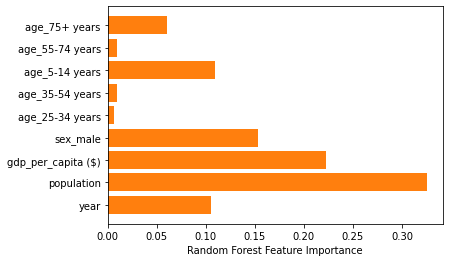

In [ ]:
plt.barh(X_t.columns.values, clf.feature_importances_)     #Thanks to https://towardsdatascience.com/the-3-ways-to-compute-feature-importance-in-the-random-forest-96c86b49e6d4
#plt.figure(figsize=(20, 5))  # width:20, height:3

sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_t.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");


# **Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1]
input_shape

9

In [ ]:
# Sequential model
model = Sequential()

In [ ]:
# First hidden layer
model.add(Dense(4, # How many neurons you have in your first hidden layer
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dropout(.2))
 #Second hidden layer
model.add(Dense(2, activation = 'relu'))

model.add(Dropout(.2))

In [ ]:
# Output layer
model.add(Dense(1, activation = 'linear'))



In [ ]:
# Step 2: Compile
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['acc'])


In [ ]:
# Step 3: Fit our model
history = model.fit(X_train_sc, y_train,
                    validation_data = (X_test_sc, y_test), 
                    epochs=20)

Epoch 1/20
609/609 [==============================] - 3s 3ms/step - loss: 528.1344 - acc: 0.1372 - val_loss: 521.1531 - val_acc: 0.0011
Epoch 2/20
609/609 [==============================] - 1s 2ms/step - loss: 513.6025 - acc: 0.0011 - val_loss: 507.4442 - val_acc: 0.0011
Epoch 3/20
609/609 [==============================] - 1s 2ms/step - loss: 500.2296 - acc: 0.0011 - val_loss: 494.6248 - val_acc: 0.0011
Epoch 4/20
609/609 [==============================] - 1s 2ms/step - loss: 487.7015 - acc: 0.0011 - val_loss: 482.6040 - val_acc: 0.0011
Epoch 5/20
609/609 [==============================] - 1s 2ms/step - loss: 475.9651 - acc: 0.0011 - val_loss: 471.3483 - val_acc: 0.0011
Epoch 6/20
609/609 [==============================] - 1s 2ms/step - loss: 465.0044 - acc: 0.0011 - val_loss: 460.8835 - val_acc: 0.0011
Epoch 7/20
609/609 [==============================] - 1s 2ms/step - loss: 454.7559 - acc: 0.0011 - val_loss: 451.0583 - val_acc: 0.0011
Epoch 8/20
609/609 [============================

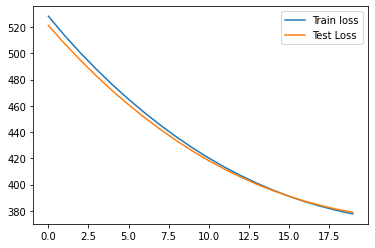

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

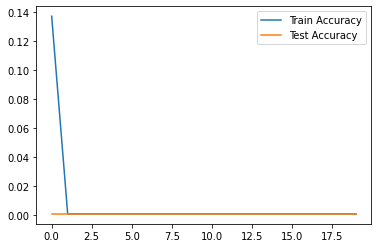

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

This is not a good model. Ultimately Random Forest Regression Model gives the best result.

# **Conclusion**

Random Forest Regression Model gives us the best result with accuracy of ~72%
 

1. If we look at the number of suicides/100k population, surprisingly most suicides are for age group 75+. Older people tend to be ignored in the society and feel lonely. 

Sol: To give extra attention to older people and make them feel part of the community.


2. Historically, there is a lot of pressure on males in the society to be a successful bread winner and be mentally strong. I think this takes a toll. We should focus on the mental health of males. 

Sol: Give attention to the Men's mental health.


3. Not at all surprisingly, GDP_per_capita plays a big role in the number of suicides. Higher GDP_per_capita indicates better quality of life and opportunities.

Sol: Focus on developing country's financial condition and business as well as investment development of the country.